# Ôn tập giữa kỳ


In [55]:
# import library...
# ...

%pip install scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\hp\appdata\local\programs\python\python313\lib\site-packages (1.15.2)



## ĐỀ BÀI

Hệ thống giám sát rủi ro dựa trên hành vi (The Behavior Risk Factor Surveilance System - BRFSS) là một cuộc khảo sát qua điện thoại hàng năm với 350.000 người ở Hoa Kỳ. Như tên gọi của nó, BRFSS được thiết kế để xác định các yếu tố nguy cơ ở người trưởng thành và báo cáo các xu hướng sức khỏe mớ. Ví dụ, người trả lời được hỏi về chế độ ăn uống và hoạt động thể chất hàng tuần, tình trạng HIV/AIDS, khả năng sử dụng thuốc lá và thậm chí cả mức độ chi trả dịch vụ chăm sóc sức khỏe của họ. 

Bộ dữ liệu **brfss_2000** chứa thông tin khảo sát năm 2000, với hơn 200 thông tin. Trong bộ dữ liệu này, ta chỉ khảo sát một số thông tin sau:
-	genhlth: người khảo sát tự đánh giá sức khỏe (excellent, very good, good, fair or poor)
-	exerany: cho biết có hoạt động thể chất nào trong tháng gần nhất hay không, có (1), không (0)
-	hlthplan: có bảo hiểm (1) hay không (0)
-	smoke100: tổng số điếu thuốc đã hút ít nhất
-	height: chiều cao (inches)
-	weight: cân nặng (pounds)
-	wtdesire:  cân nặng mong muốn(pounds)
-	age: tuổi
-	gender: giới tính: nam(m), nữ(f)


### Câu 1:

Đọc hai bộ dữ liệu trên và cho biết mỗi bộ dữ liệu có kích thước bao nhiêu dòng, bao nhiêu cột?

In [102]:
df1 = pd.read_csv("./data/brfss.csv")
df1.shape

(20000, 9)

In [4]:
df2_2000 = pd.read_csv("./data/brfss_2000.csv")
df2_2000.shape

(20000, 9)

In [5]:
df1.head(3)

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good


In [6]:
df2_2000.head(3)

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good


### Câu 2

a, Tính tỷ lệ nam nữ

b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?

In [38]:
# ### Câu 2

# a, Tính tỷ lệ nam nữ
print(f"Ty le nam - nu: {df1[df1.gender == 'm'].shape[0] * 100/ df1.shape[0] :.4f} - {df1[df1.gender == "f"].shape[0] * 100 / df1.shape[0] :.4f}")

# b, Trong số những người tập thể thao, tỷ lệ những người tự đánh giá có sức khỏe kém là bao nhiêu?
print(df1.genhlth.unique())
print(df1.groupby('exerany')['genhlth'].value_counts())

ge_bh = df1[(df1.genhlth == "poor") & (df1.exerany == 1)]
print(ge_bh.shape[0])
print(f"Ty le: {df1[(df1.genhlth == "poor") & (df1.exerany == 1)].shape[0] * 100 / df1.shape[0]} %")

Ty le nam - nu: 47.8450 - 52.1550
['good' 'very good' 'excellent' 'fair' 'poor']
exerany  genhlth  
0        good         1731
         very good    1352
         fair          857
         excellent     762
         poor          384
1        very good    5620
         good         3944
         excellent    3895
         fair         1162
         poor          293
Name: count, dtype: int64
293
Ty le: 1.465 %


### Câu 3

a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.

b, Tính tỷ lệ những người muốn giảm cân.

In [52]:
# ### Câu 3

# a, Đổi đơn vị chiều cao từ inches sang centimet, đơn vị cân nặng từ pound sang kg.
temp = df1.height * 2.54
temp.head()
temp2 = df1.weight / 2.2
temp2.head()

# b, Tính tỷ lệ những người muốn giảm cân.
print(df1[df1.weight > df1.wtdesire].shape[0])

12764


### Câu 4:

a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa

b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục

Shapiro-Wilk Test for exerany: Statistic=0.5421828223838523, p-value=6.754977661529448e-114
exerany khong co phan phoi chuan
Shapiro-Wilk Test for hlthplan: Statistic=0.38942721482716824, p-value=9.27833268022991e-122
hlthplan khong co phan phoi chuan
Shapiro-Wilk Test for smoke100: Statistic=0.6354880960859652, p-value=7.310955058115306e-108
smoke100 khong co phan phoi chuan
Shapiro-Wilk Test for height: Statistic=0.987054461766078, p-value=1.3288945815186308e-38
height khong co phan phoi chuan
Shapiro-Wilk Test for weight: Statistic=0.9558423095859147, p-value=6.602889055927459e-60
weight khong co phan phoi chuan
Shapiro-Wilk Test for wtdesire: Statistic=0.9547333832074814, p-value=2.184290092180825e-60
wtdesire khong co phan phoi chuan
Shapiro-Wilk Test for age: Statistic=0.9636162905179173, p-value=3.1823152845728513e-56
age khong co phan phoi chuan


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


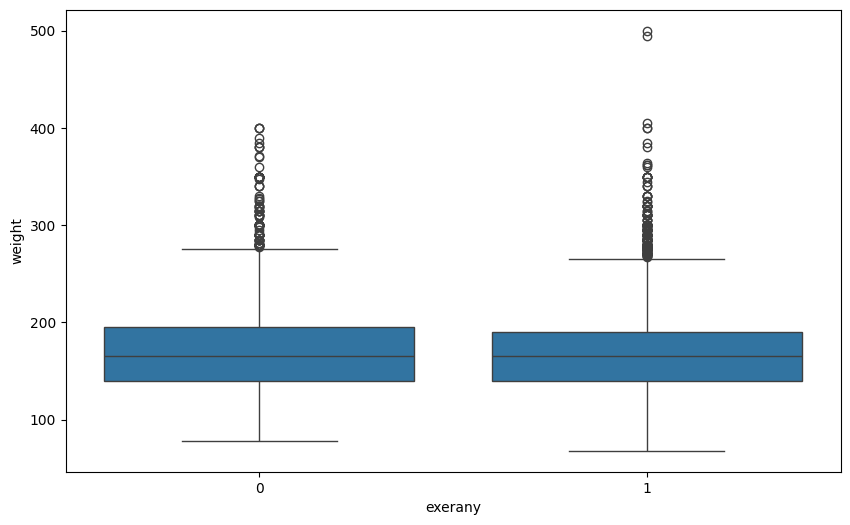

In [64]:
# ### Câu 4:

# a, Theo bạn trong các thuộc tính trên, thuộc tính nào có phân phối chuẩn. Vẽ hình minh họa
for col in df1.select_dtypes(include=[np.number]).columns:
    stat, p_value = shapiro(df1[col])
    print(f"Shapiro-Wilk Test for {col}: Statistic={stat}, p-value={p_value}")
    if p_value > 0.05:
        print(f"{col} co phan phoi chuan")
    else:
        print(f"{col} khong co phan phoi chuan")
# b, Vẽ đồ thị boxplot so sánh cân nặng của những người có tập thể dục
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='exerany', y='weight')
plt.show()



### Câu 5

Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?



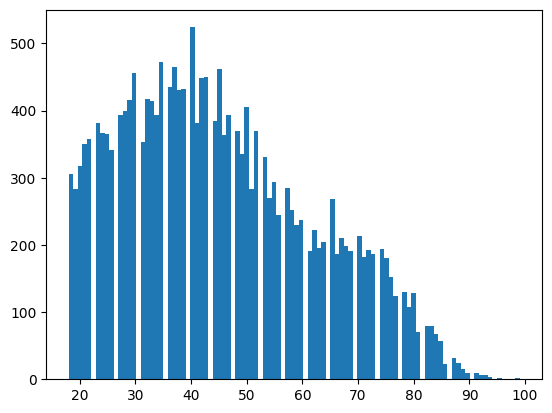

Tuoi trung binh, do lech chuan, phan vi 25, 50, 75: 
45.0682, 17.19268947448503, 31.0, 43.0, 57.0


In [75]:

# ### Câu 5

# Phân bố tuổi tác trong mẫu: Hãy mô tả phân bố tuổi của người tham gia khảo sát. Tuổi trung bình, độ lệch chuẩn, và các phân vị 25%, 50%, 75% là bao nhiêu?
plt.hist(df1.age, bins=100)
plt.show()

print(f"Tuoi trung binh, do lech chuan, phan vi 25, 50, 75: \n{df1.age.mean():.4f}, {df1.age.std()}, {df1.age.quantile(0.25)}, {df1.age.quantile(0.5)}, {df1.age.quantile(0.75)}")


In [76]:
df1.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good


### Câu 6

Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?



Ty le nguoi hut thuoc: 47.20%


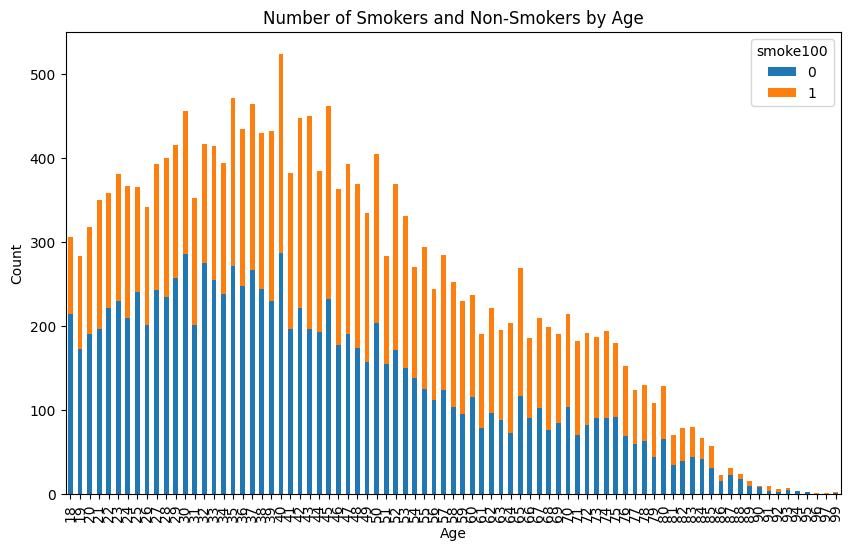

In [83]:
# ### Câu 6

# Tỉ lệ người hút thuốc: Tính tỉ lệ phần trăm người tham gia khảo sát hiện đang hút thuốc lá. Liệu có sự khác biệt đáng kể về tỉ lệ này giữa các nhóm tuổi khác nhau không?

print(f"Ty le nguoi hut thuoc: {df1[df1.smoke100 == 1].shape[0] * 100 / df1.shape[0]:.2f}%")

age_gr_smoke = df1.groupby(['age', 'smoke100']).size().unstack(fill_value=0)

age_gr_smoke.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Number of Smokers and Non-Smokers by Age')
plt.show()

### Câu 7

BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu. 



In [118]:
# ### Câu 7

# BMI trung bình theo giới tính: Tính chỉ số BMI trung bình cho nam và nữ trong mẫu.
# df2 = df1
# df2.height = df1.height * 2.54
# df2.weight = df1.weight / 2.2
df2.head()

male = df2[df2.gender == 'm']
female = df2[df2.gender == 'f']

height_m_male = male.height / 100
height_m_female = female.height / 100

bmi_male = male.weight / (height_m_male ** 2)
print(bmi_male.mean())

bmi_female = female.weight / (height_m_female ** 2)
print(bmi_female.mean())


26.9829119535115
25.797787555079438


### câu 8

Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi. 

In [119]:
# ### câu 8

# Phân tích tỉ lệ bệnh béo phì: Sử dụng các tiêu chuẩn của CDC về chỉ số BMI để phân loại người tham gia vào nhóm béo phì. Tính tỉ lệ béo phì theo giới tính và độ tuổi.

# CDC BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply BMI categorization
df1['bmi'] = df1['weight'] / (df1['height'] / 100) ** 2
df1['bmi_category'] = df1['bmi'].apply(categorize_bmi)

# Calculate obesity rate by gender
obesity_rate_gender = df1[df1['bmi_category'] == 'Obese'].groupby('gender').size() * 100 / df1.groupby('gender').size()
print("Obesity rate by gender:")
print(obesity_rate_gender)

# Calculate obesity rate by age group
df1['age_group'] = pd.cut(df1['age'], bins=[18, 30, 40, 50, 60, 70, 80, 90, 100], right=False)
obesity_rate_age = df1[df1['bmi_category'] == 'Obese'].groupby('age_group').size() * 100 / df1.groupby('age_group').size()
print("\nObesity rate by age group:")
print(obesity_rate_age) 

Obesity rate by gender:
gender
f    20.161058
m    21.109834
dtype: float64

Obesity rate by age group:
age_group
[18, 30)     14.375877
[30, 40)     20.852858
[40, 50)     23.497932
[50, 60)     25.827144
[60, 70)     24.809886
[70, 80)     17.739026
[80, 90)     11.867365
[90, 100)     4.878049
dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13876\3209116867.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity_rate_age = df1[df1['bmi_category'] == 'Obese'].groupby('age_group').size() * 100 / df1.groupby('age_group').size()
C:\Users\HP\AppData\Local\Temp\ipykernel_13876\3209116867.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity_rate_age = df1[df1['bmi_category'] == 'Obese'].groupby('age_group').size() * 100 / df1.groupby('age_group').size()


---